<h1>Importing libraries</h1>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<h1>Saving all the csv files into one variable </h1>

In [98]:


# List of CSV file paths
csv_files = [
    'Sales_April_2019.csv',
    'Sales_August_2019.csv',
    'Sales_December_2019.csv',
    'Sales_February_2019.csv',
    'Sales_January_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv'
]



<h1> Merging all the CSV files </h1>

In [99]:
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

print(merged_df.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


<h1>Converting Order ID , price Each to numeric values and Order Date to date and time since they are in object type</h1>

In [100]:
# Convert 'Order ID' and 'Price Each' to numeric values
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('category')

df.info()

C:\Users\anuz\AppData\Local\Temp\ipykernel_4740\4121966616.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18289 non-null  float64       
 1   Product           18324 non-null  object        
 2   Quantity Ordered  18324 non-null  category      
 3   Price Each        18289 non-null  float64       
 4   Order Date        18289 non-null  datetime64[ns]
 5   Purchase Address  18324 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), object(2)
memory usage: 736.5+ KB


In [101]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [102]:
df.shape

(18383, 6)

<h1>Checking and removing all the null or missing values</h1>

In [103]:
missing_values = df.isnull().sum()
print(missing_values)

Order ID            94
Product             59
Quantity Ordered    59
Price Each          94
Order Date          94
Purchase Address    59
dtype: int64


In [104]:
# Handling any NaT values if needed, for example by dropping rows with NaT in 'Order Date'
df = df.dropna(subset=['Order Date'])
missing_values = df.isnull().sum()
print(missing_values)

df.head()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [105]:
df.shape

(18289, 6)

In [106]:


# Extract date components
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

C:\Users\anuz\AppData\Local\Temp\ipykernel_4740\1176798809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.month
C:\Users\anuz\AppData\Local\Temp\ipykernel_4740\1176798809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Order Date'].dt.day
C:\Users\anuz\AppData\Local\Temp\ipykernel_4740\1176798809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<h1>Using labelEncoder to encode categorical columns like product and purchase address

In [107]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Product', 'Purchase Address']

# Apply label encoding to each column using .loc
for col in categorical_columns:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# Verify the encoding
print(df.head())


   Order ID Product Quantity Ordered  Price Each          Order Date  \
0  176558.0      15                2       11.95 2019-04-19 08:46:00   
2  176559.0       7                1       99.99 2019-04-07 22:30:00   
3  176560.0       9                1      600.00 2019-04-12 14:38:00   
4  176560.0      17                1       11.99 2019-04-12 14:38:00   
5  176561.0      17                1       11.99 2019-04-30 09:27:00   

  Purchase Address  Month  Day  Hour  Minute  
0            15504      4   19     8      46  
2            11070      4    7    22      30  
3            10818      4   12    14      38  
4            10818      4   12    14      38  
5             4382      4   30     9      27  


<h1>Calculating correlation matrix

In [108]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Order ID   Product  Quantity Ordered  Price Each  \
Order ID          1.000000  0.004491         -0.005844    0.003377   
Product           0.004491  1.000000         -0.116979    0.137425   
Quantity Ordered -0.005844 -0.116979          1.000000   -0.150440   
Price Each        0.003377  0.137425         -0.150440    1.000000   
Order Date        0.005242 -0.019834         -0.001097    0.016538   
Purchase Address -0.002479 -0.003124          0.005545   -0.002823   
Month            -0.005929 -0.001998         -0.007977    0.022785   
Day               0.006057 -0.019467          0.000116    0.013563   
Hour             -0.000171 -0.003033         -0.005377   -0.003884   
Minute           -0.001934 -0.016810          0.008645   -0.009976   

                  Order Date  Purchase Address     Month       Day      Hour  \
Order ID            0.005242         -0.002479 -0.005929  0.006057 -0.000171   
Product            -0.019834         -0.003124 -0.001998 -0.019467 -0

<h1>Visualizing Correlation matrix

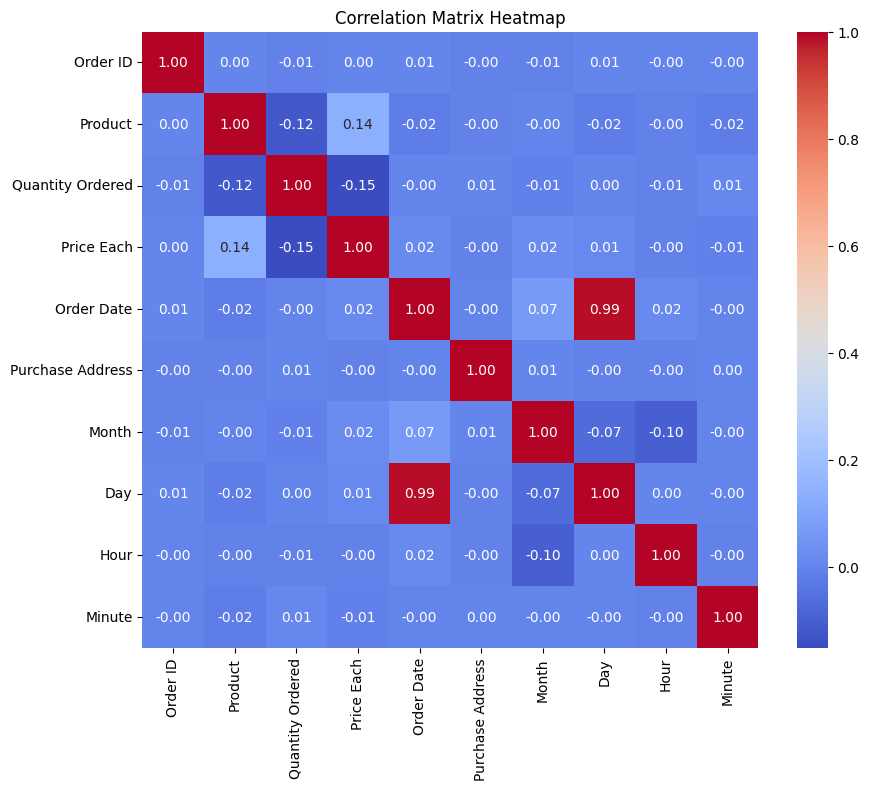

In [109]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Other features such as "Order Date", "Purchase Address", "Month", "Day", "Hour", and "Minute" have very weak correlations with "Quantity Ordered", indicating little to no linear relationship between them.

In [110]:
dfC = df.drop(["Order ID", "Purchase Address", "Day","Month", "Hour", "Minute"], axis=1)
dfC_corr = dfC.corr()
print(dfC_corr)


                   Product  Quantity Ordered  Price Each  Order Date
Product           1.000000         -0.116979    0.137425   -0.019834
Quantity Ordered -0.116979          1.000000   -0.150440   -0.001097
Price Each        0.137425         -0.150440    1.000000    0.016538
Order Date       -0.019834         -0.001097    0.016538    1.000000


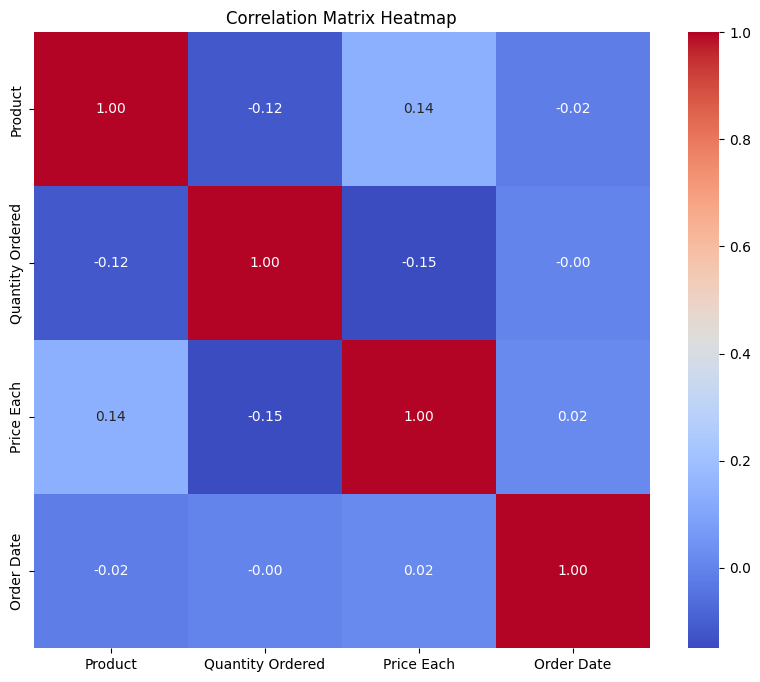

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfC_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


There is a  negative correlation between "Quantity Ordered" and "Product" (-0.116979) and "Price Each" (-0.150440), meaning that higher product prices might lead to lower quantities ordered.

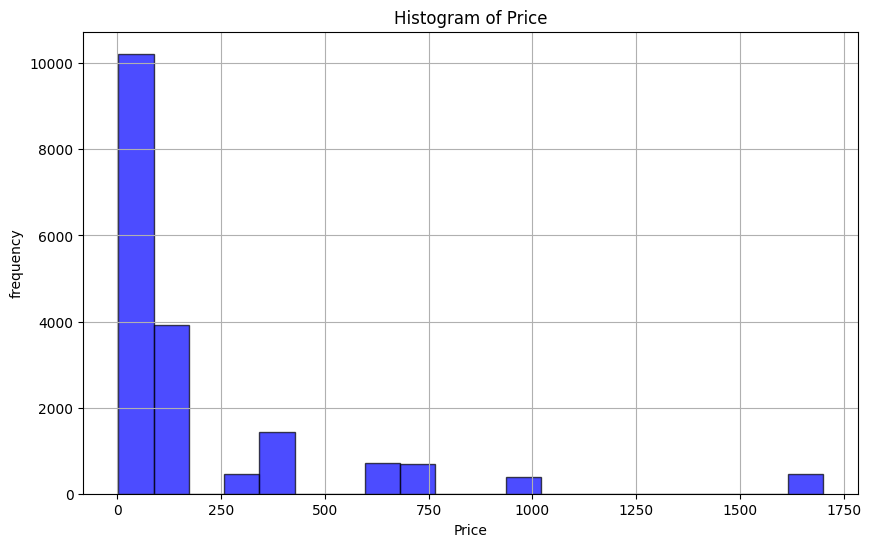

In [112]:
plt.figure(figsize=(10,6))
plt.hist(df['Price Each'],bins=20, color='blue', edgecolor = 'black', alpha = 0.7)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

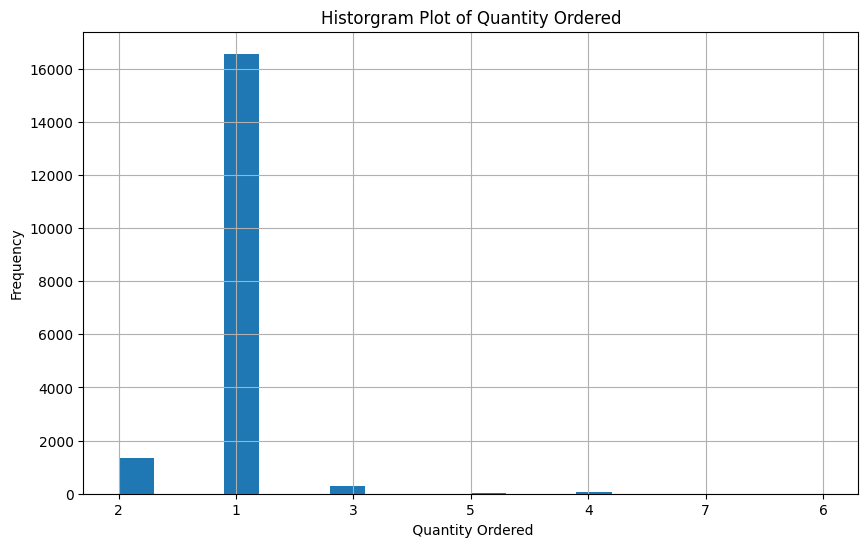

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity Ordered'], bins=20, alpha=1)
plt.title('Historgram Plot of Quantity Ordered')
plt.xlabel(' Quantity Ordered')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h1>Spliting train test and fitting linearRegression algorithm to model</h1>

In [118]:


# Assuming 'Quantity Ordered' is the target variable
y = df['Quantity Ordered']

# Drop rows with missing or invalid values in the target variable
df.dropna(subset=['Quantity Ordered'], inplace=True)
df = df[df['Quantity Ordered'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Convert 'Quantity Ordered' to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

# Extract features
X = df[['Order ID', 'Price Each']]  # Example features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)




<h1> Evaluation Metrics</h2>

In [120]:
from sklearn.metrics import accuracy_score

# Convert predicted quantities to discrete values (e.g., round to nearest integer)
y_pred_discrete = np.round(y_pred)

# Convert 'Quantity Ordered' to discrete values for comparison
y_test_discrete = np.round(y_test)

# Compute accuracy
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)
print("Accuracy:", accuracy)


Accuracy: 0.9040459267359213


In [119]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19187790873858016
